In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr

import pandas as pd
import cst
import pyaldata

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

In [6]:
lambda_to_use = 3.3
delay = 100
trial_length = 6
dt = 1e-3
num_timepoints = int(trial_length/dt)
scale = 5
hand_pos = np.zeros((num_timepoints))
cursor_pos = np.zeros((num_timepoints))
hand_pos[:delay] = np.repeat(3,delay)

for timepoint in range(1,num_timepoints):
    cursor_vel = lambda_to_use*(cursor_pos[timepoint-1]+hand_pos[timepoint-1])
    cursor_pos[timepoint] = dt*cursor_vel+cursor_pos[timepoint-1]
    if timepoint>=delay:
        hand_pos[timepoint] = -1.1*cursor_pos[timepoint-delay]
    else:
        hand_pos[timepoint] = hand_pos[timepoint-1]

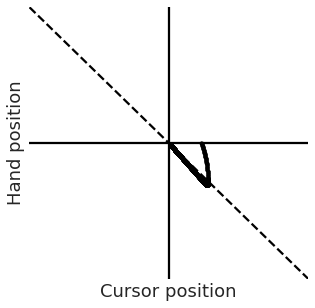

In [8]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim(-scale,scale)
ax.set_ylim(-scale,scale)
sm_scatter_args = {
    's': 5,
    'c': 'k'
}
sm_sc = cst.plot_sensorimotor(ax=ax,scatter_args=sm_scatter_args)

def animate_smplot(i):
#     cursor_l.set_data(np.arange(delay,i)*dt,cursor_pos[delay:i])
#     hand_l.set_data(np.arange(delay,i)*dt,hand_pos[delay:i])
    sm_sc.set_offsets(np.c_[cursor_pos[delay:i],hand_pos[delay:i]])
    
ani = mpl.animation.FuncAnimation(
    fig=fig,
    func=animate_smplot,
    interval=30,
    frames=range(delay,num_timepoints,30),
    repeat=False
)

from IPython.display import HTML
HTML(ani.to_jshtml())

# anim_savename = r'/mnt/c/Users/Raeed/Wiki/professional/agendas/smr-meetings/presentations/20210709-cst-analysis/assets/smplot_delay_nospiral_anim.mp4'
# writer = mpl.animation.FFMpegWriter(fps=30) 
# ani.save(anim_savename, writer=writer)